# Hypothesis Testing and Normality Analysis with Real-World Datasets

## **Objective of the Lab**
In this lab, we will focus on understanding and applying hypothesis testing and normality analysis on two real-world datasets:
1. **Housing Data (Sale Prices)**
2. **Cancer Data (Tumor Characteristics)**

The primary goals of this lab are:
1. **Assess the normality** of the datasets using various statistical techniques.
2. Perform **hypothesis testing** to evaluate differences and relationships within the data.
3. Use **transformations** to make data more suitable for hypothesis testing (e.g., log transformation for non-normal data).
4. **Interpret the results** of hypothesis tests and draw meaningful conclusions.

## **Overview of Key Concepts**
This lab covers the following key concepts:
- **Normality Tests**: We will use the **Shapiro-Wilk test** to determine if the data follows a normal distribution. Additionally, we will visualize data using **histograms**, **Q-Q plots**, and **boxplots**.
  
- **Hypothesis Testing**: We will apply various hypothesis tests to assess if there are statistically significant differences or associations within the data. These include:
  - **T-tests** to compare the means of two groups (e.g., comparing sale prices between neighborhoods).
  - **Chi-Square tests** to evaluate the relationship between categorical variables (e.g., tumor size categories and cancer diagnosis).
  
- **Data Transformation**: To improve the distribution of data that is not normally distributed, we will apply **logarithmic transformations** and re-evaluate normality.

## **Datasets**
1. **Housing Data (Sale Prices)**: This dataset includes information on sale prices of homes. We'll test for normality and perform hypothesis tests to compare sale prices between different neighborhoods.
   
2. **Cancer Data (Tumor Characteristics)**: This dataset contains tumor characteristics, including the radius of the tumor. We'll test for normality and use Chi-Square tests to investigate relationships between tumor size and cancer diagnosis (benign vs. malignant).

## **Approach**
1. **Normality Testing**:
   - **Shapiro-Wilk Test**: To assess if the data follows a normal distribution.
   - **Visualizations**: We will use histograms, Q-Q plots, and boxplots to examine the distribution of the data visually.

2. **Hypothesis Testing**:
   - **T-test**: To test if there is a significant difference in sale prices between two neighborhoods.
   - **Chi-Square Test**: To investigate the relationship between tumor size category (Low, Medium, High) and cancer diagnosis (Benign vs. Malignant).

3. **Data Transformation**:
   - Log transformation will be applied to the sale price data to see if it makes the data more normally distributed.

## **Libraries Used**
The following libraries will be used for this analysis:
- **`numpy`**: For numerical operations.
- **`pandas`**: For data manipulation and analysis.
- **`scipy`**: For statistical tests (e.g., Shapiro-Wilk, T-test, Chi-Square).
- **`matplotlib`** and **`seaborn`**: For data visualization (histograms, Q-Q plots, etc.).

---

Let's get started by loading the necessary libraries and the datasets. Then, we will begin by performing normality tests and hypothesis testing.


1.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('properties.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['SalePrice'])
print(f'Statistic={stat}, p={p}')

print(p<0.05)

Statistic=0.8696714665902145, p=3.2061412312021656e-33
True


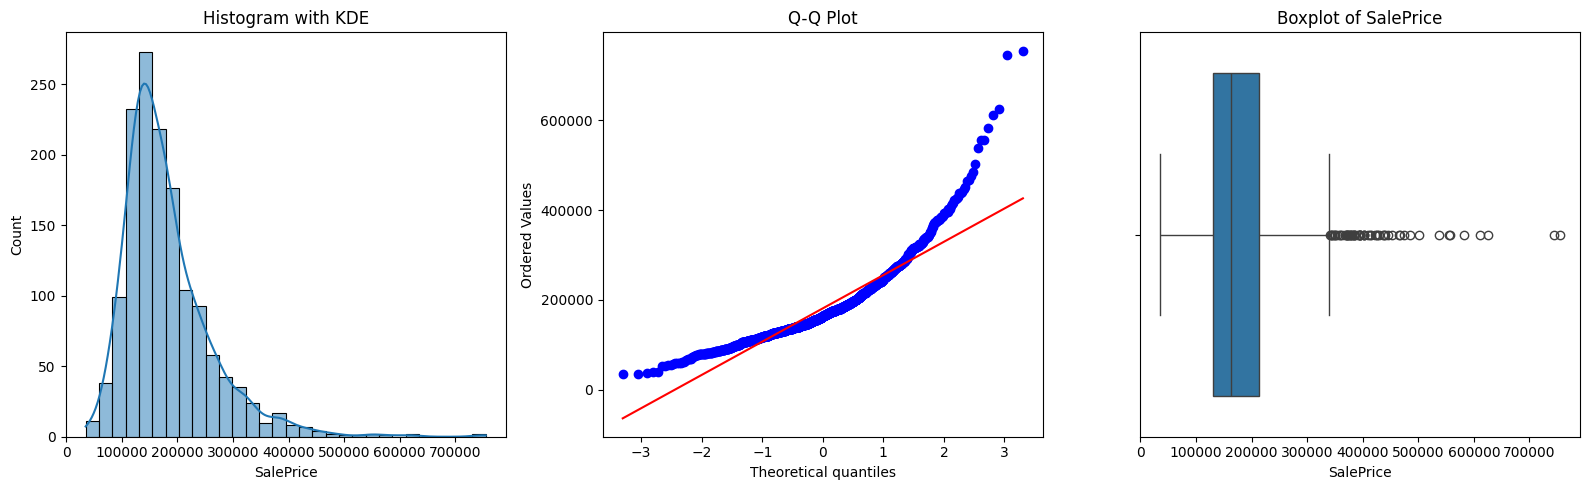

In [ ]:
#Shapiro Wilk test visuals
from scipy.stats import probplot



plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Histogram with KDE')

plt.subplot(1, 3, 2)
probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of SalePrice')

plt.tight_layout()
plt.show()


1. Tells you that SalePrice is statistically not normally distributed.
The null hypothesis of the Shapiro-Wilk test is: “The data is normally distributed.”
A p-value < 0.05 → You reject that hypothesis ⇒ Data is not normal.
2. Histogram/KDE
Visually shows right skewness, which means many houses have moderate prices, and a few have very high prices (long right tail).
3. Q-Q Plot
Further confirms non-normality, especially in the tails .
Shows the data deviates from a normal distribution at specific quantiles.
4. Boxplot
The outliers, signiicantly affect both normality and modeling accuracy.

In [ ]:
from scipy.stats import skew, kurtosis

saleprice_skew = skew(df['SalePrice'])
saleprice_kurt = kurtosis(df['SalePrice'])

print(f"Skewness of SalePrice: {saleprice_skew:.4f}")
print(f"Kurtosis of SalePrice (excess): {saleprice_kurt:.4f}")


Skewness of SalePrice: 1.8809
Kurtosis of SalePrice (excess): 6.5098


Skewness > 0 (positive skew)<br>
Kurtosis > 0 (leptokurtic with heavy tails (long and narrow), indicating many extreme values)<br>
Extreme values for skewness (e.g., > 1 or < -1) or kurtosis (e.g., > 4 or < 2) suggest a non-normal distribution.

In [ ]:
# logarithmic transformation to make it more normal

df['LogSalePrice'] = np.log(df['SalePrice'])


#  skewness and kurtosis again
log_saleprice_skew = skew(df['LogSalePrice'])
log_saleprice_kurt = kurtosis(df['LogSalePrice'], fisher=True)

print(f"Skewness of LogSalePrice: {log_saleprice_skew:.4f}")
print(f"Kurtosis of LogSalePrice (excess): {log_saleprice_kurt:.4f}")


Skewness of LogSalePrice: 0.1212
Kurtosis of LogSalePrice (excess): 0.8027


* Both skewness and kurtosis closer to 0 in log transformed data.

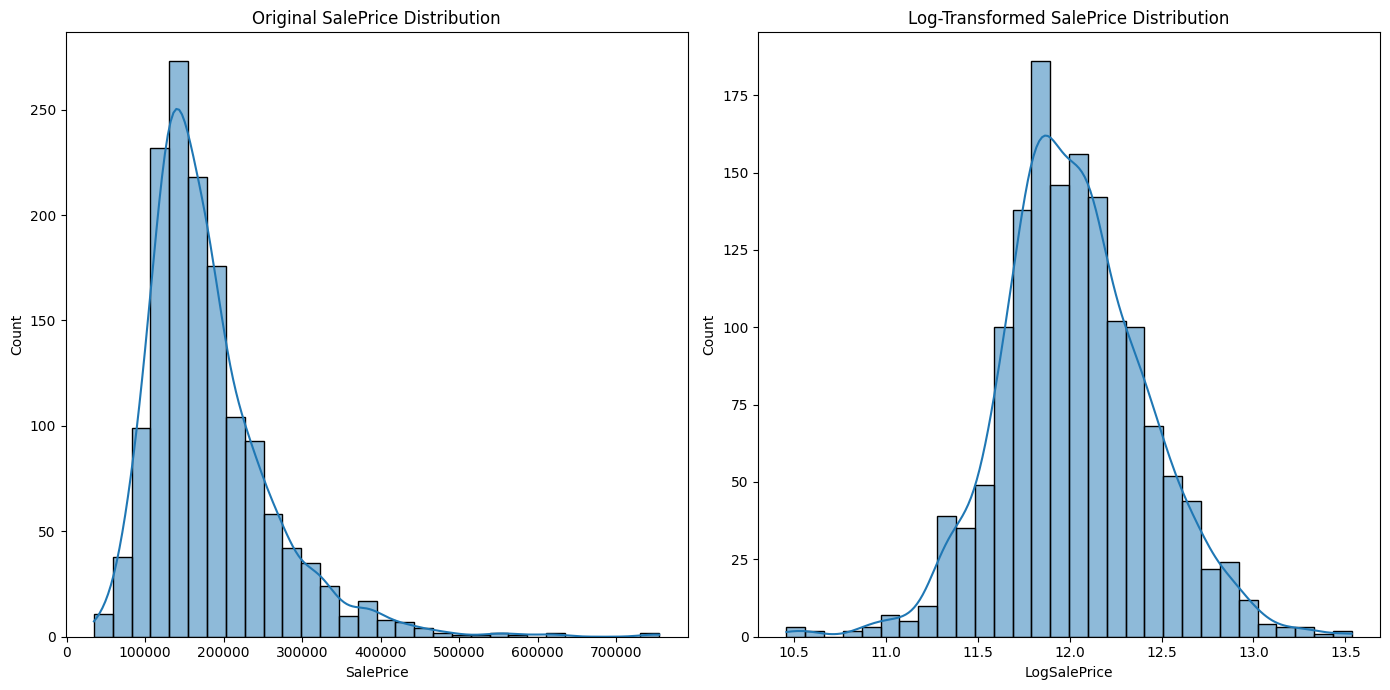

In [ ]:

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Original SalePrice Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['LogSalePrice'], kde=True, bins=30)
plt.title('Log-Transformed SalePrice Distribution')

plt.tight_layout()
plt.show()


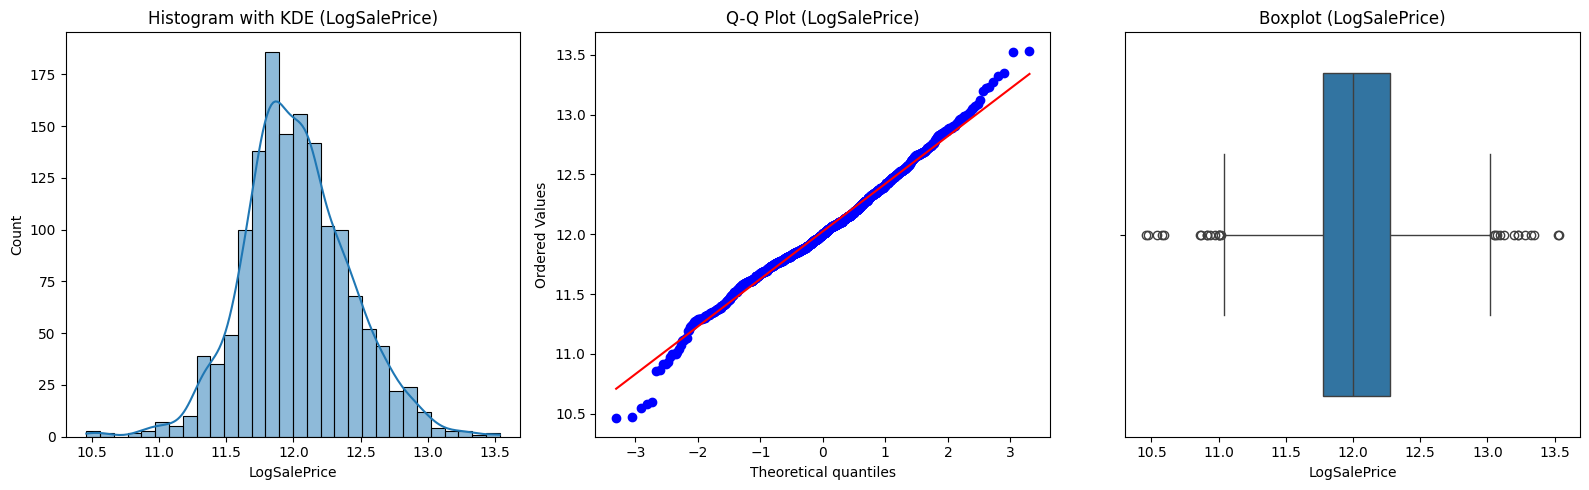

In [ ]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['LogSalePrice'], kde=True, bins=30)
plt.title('Histogram with KDE (LogSalePrice)')

plt.subplot(1, 3, 2)
probplot(df['LogSalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot (LogSalePrice)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['LogSalePrice'])
plt.title('Boxplot (LogSalePrice)')

plt.tight_layout()
plt.show()

In [ ]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [ ]:
from scipy.stats import ttest_ind

tt_stat, p_val = ttest_ind(df[df['Neighborhood'] == 'NAmes']['LogSalePrice'],
                           df[df['Neighborhood'] == 'CollgCr']['LogSalePrice'])

print(f'T-statistic: {tt_stat:.4f}, p-value: {p_val:.4f}')


T-statistic: -12.3603, p-value: 0.0000


 1. P-value:

* P-value = 0.0000 (less than 0.05) means you reject the null hypothesis.<br>
* Null hypothesis (H₀): There is no significant difference between the * * LogSalePrice of the two neighborhoods.<br>
* Alternative hypothesis (H₁): There is a significant difference between the LogSalePrice of the two neighborhoods.<br>

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the log-transformed sale prices of the two neighborhoods are statistically significantly different.<br><br>

2. T-statistic:

* The t-statistic of -12.3603 indicates the magnitude of the difference between the means of the two groups in standard deviation units.
* A large negative t-statistic suggests that the mean LogSalePrice in NAmes is significantly lower than in CollgCr.

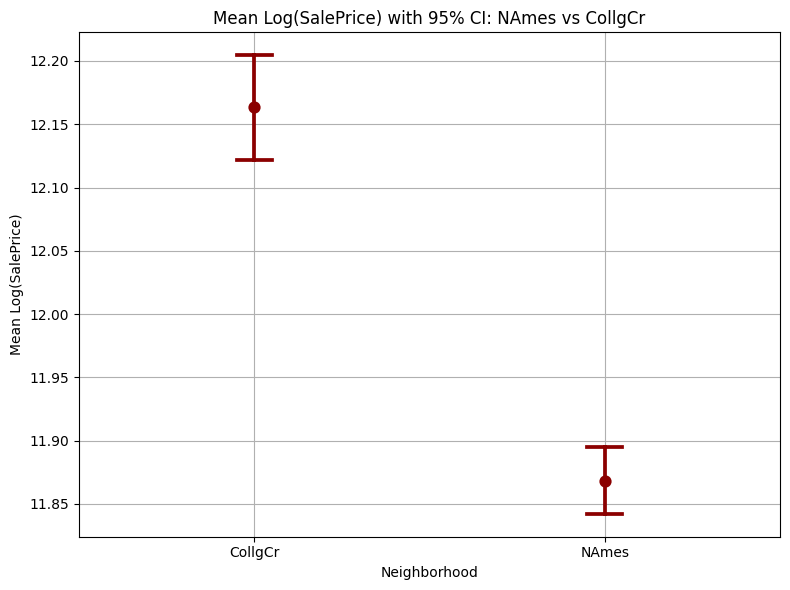

In [ ]:

subset = df[df['Neighborhood'].isin(['NAmes', 'CollgCr'])]

# plot 95% CI error bars
plt.figure(figsize=(8, 6))
sns.pointplot(x='Neighborhood', y='LogSalePrice', data=subset,
              errorbar=('ci', 95), capsize=0.1, linestyle='none', color='darkred')

plt.title('Mean Log(SalePrice) with 95% CI: NAmes vs CollgCr')
plt.ylabel('Mean Log(SalePrice)')
plt.xlabel('Neighborhood')
plt.grid(True)
plt.tight_layout()
plt.show()


* The error bars show the 95% confidence interval around each mean.
* The error bars do not overlap, it's a strong visual indication of statistical significance.

In [ ]:
# Sample variances

na_log = df[df['Neighborhood'] == 'NAmes']['LogSalePrice']
collgcr_log = df[df['Neighborhood'] == 'CollgCr']['LogSalePrice']

var_na = na_log.var()
var_collgcr = collgcr_log.var()

print(f"Variance (NAmes): {var_na:.4f}")
print(f"Variance (CollgCr): {var_collgcr:.4f}")


Variance (NAmes): 0.0426
Variance (CollgCr): 0.0647


In [ ]:
from scipy.stats import ttest_ind

# Standard t-test (assumes equal variances)
t_eq, p_eq = ttest_ind(na_log, collgcr_log, equal_var=True)

# Welch's t-test (assumes unequal variances)
t_uneq, p_uneq = ttest_ind(na_log, collgcr_log, equal_var=False)

print("== Standard T-Test (Equal Variances) ==")
print(f"T-statistic: {t_eq:.4f}, P-value: {p_eq:.4e}")

print("\n== Welch's T-Test (Unequal Variances) ==")
print(f"T-statistic: {t_uneq:.4f}, P-value: {p_uneq:.4e}")


== Standard T-Test (Equal Variances) ==
T-statistic: -12.3603, P-value: 1.1900e-29

== Welch's T-Test (Unequal Variances) ==
T-statistic: -11.8601, P-value: 1.8639e-26


There is a statistically significant difference in log sale prices between NAmes and CollgCr. The difference is not likely due to random chance (since the p-values are so small).

<ipython-input-149-14ac5c9c6320>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Neighborhood', y='LogSalePrice', data=subset, inner='box', palette='Set2')


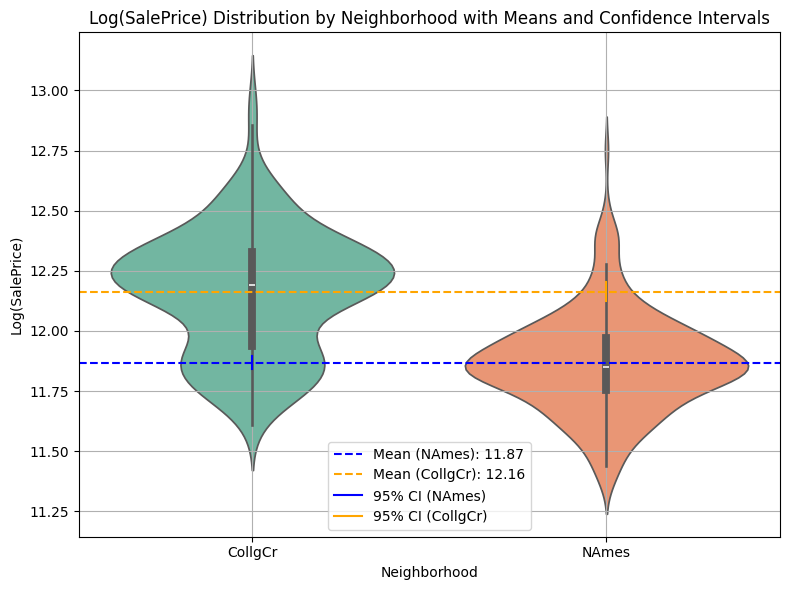

In [ ]:
from scipy.stats import t


#  plotting
subset = df[df['Neighborhood'].isin(['NAmes', 'CollgCr'])]

plt.figure(figsize=(8, 6))
sns.violinplot(x='Neighborhood', y='LogSalePrice', data=subset, inner='box', palette='Set2')

mean_na = na_log.mean()
mean_collgcr = collgcr_log.mean()

plt.axhline(mean_na, color='blue', linestyle='--', label=f'Mean (NAmes): {mean_na:.2f}')
plt.axhline(mean_collgcr, color='orange', linestyle='--', label=f'Mean (CollgCr): {mean_collgcr:.2f}')


df_na = len(na_log) - 1
df_collgcr = len(collgcr_log) - 1

sem_na = na_log.sem()
sem_collgcr = collgcr_log.sem()

ci_na = t.interval(0.95, df_na, loc=mean_na, scale=sem_na)
ci_collgcr = t.interval(0.95, df_collgcr, loc=mean_collgcr, scale=sem_collgcr)

plt.plot([0, 0], [ci_na[0], ci_na[1]], color='blue', label=f'95% CI (NAmes)')
plt.plot([1, 1], [ci_collgcr[0], ci_collgcr[1]], color='orange', label=f'95% CI (CollgCr)')

plt.title('Log(SalePrice) Distribution by Neighborhood with Means and Confidence Intervals')
plt.ylabel('Log(SalePrice)')
plt.xlabel('Neighborhood')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2. Cancer Data


In [ ]:

df1=pd.read_csv('cancer_data.csv')
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df1.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:

df1.drop(columns=['id', 'Unnamed: 32'], inplace=True)

df1['diagnosis'] = df1['diagnosis'].map({'M': 1, 'B': 0})

X = df1.drop('diagnosis', axis=1)
y = df1['diagnosis']


In [ ]:


benign = df1[df1['diagnosis'] == 0]['radius_mean']
malignant = df1[df1['diagnosis'] == 1]['radius_mean']
print(pd.DataFrame(benign))
print(pd.DataFrame(malignant))

stat_benign, p_benign = shapiro(benign)
print("Shapiro-Wilk test for benign group:", stat_benign, p_benign)

stat_malignant, p_malignant = shapiro(malignant)
print("Shapiro-Wilk test for malignant group:", stat_malignant, p_malignant)


     radius_mean
19        13.540
20        13.080
21         9.504
37        13.030
46         8.196
..           ...
558       14.590
559       11.510
560       14.050
561       11.200
568        7.760

[357 rows x 1 columns]
     radius_mean
0          17.99
1          20.57
2          19.69
3          11.42
4          20.29
..           ...
563        20.92
564        21.56
565        20.13
566        16.60
567        20.60

[212 rows x 1 columns]
Shapiro-Wilk test for benign group: 0.9966531507162536 0.6679930583301221
Shapiro-Wilk test for malignant group: 0.9776597278513985 0.0018945730576488433


* Benign Group (Shapiro-Wilk Test Result: 0.6679)<br>
Test statistic: 0.9967<br>
p-value: 0.6680<br>
 Since the p-value is greater than 0.05, you fail to reject the null hypothesis, meaning the data for the benign group does follow a normal distribution. <br>

* Malignant Group (Shapiro-Wilk Test Result: 0.0019)<br>
Test statistic: 0.9777<br>
p-value: 0.0019<br>
Since the p-value is less than 0.05, you reject the null hypothesis, meaning the data for the malignant group does not follow a normal distribution.

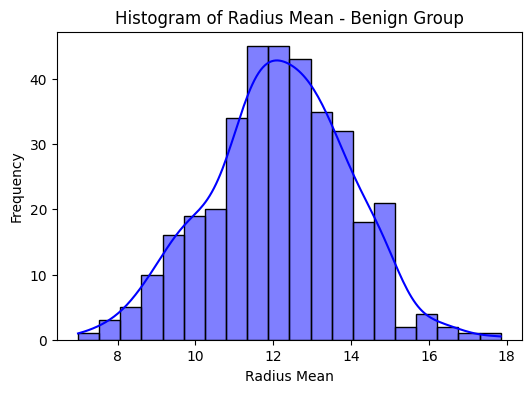

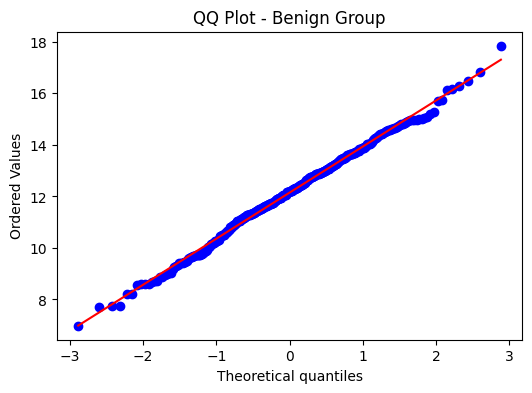

In [ ]:


# Extract benign data
benign = df1[df1['diagnosis'] == 0]['radius_mean']

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(benign, kde=True, color='blue', bins=20)
plt.title('Histogram of Radius Mean - Benign Group')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

# QQ Plot
plt.figure(figsize=(6, 4))
stats.probplot(benign, dist="norm", plot=plt)
plt.title("QQ Plot - Benign Group")
plt.show()


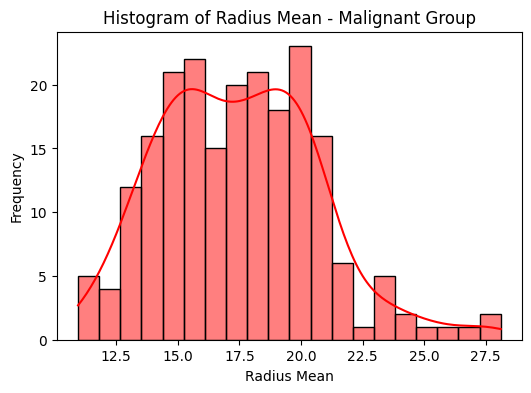

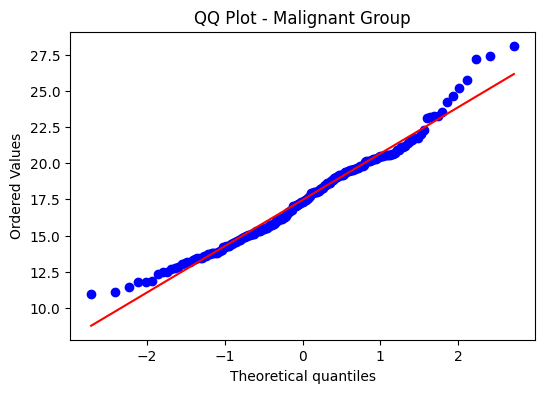

In [ ]:
# Extract malignant data
malignant = df1[df1['diagnosis'] == 1]['radius_mean']

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(malignant, kde=True, color='red', bins=20)
plt.title('Histogram of Radius Mean - Malignant Group')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

# QQ Plot
plt.figure(figsize=(6, 4))
stats.probplot(malignant, dist="norm", plot=plt)
plt.title("QQ Plot - Malignant Group")
plt.show()


In [ ]:
from scipy.stats import skew, kurtosis

benign_data = df1[df1['diagnosis'] == 0]['radius_mean']

# Skewness and Kurtosis
benign_skew = skew(benign_data)
benign_kurt = kurtosis(benign_data, fisher=False)  # Use fisher=False to get normal-style kurtosis

print("Benign - Skewness:", benign_skew)
print("Benign - Kurtosis:", benign_kurt)


Benign - Skewness: -0.08344660198964893
Benign - Kurtosis: 2.971128448405899


* Skewness: -0.083
This value is very close to 0, which means the distribution is almost symmetric.

* Kurtosis: 2.97
This value is very close to 3, which is the kurtosis of a normal distribution.

The radius_mean for the benign group is very close to normally distributed, consistent with the earlier Shapiro-Wilk test (p = 0.6679, which did not reject normality).

In [ ]:
malignant_data = df1[df1['diagnosis'] == 1]['radius_mean']

# Skewness and Kurtosis
malignant_skew = skew(malignant_data)
malignant_kurt = kurtosis(malignant_data, fisher=False)

print("Malignant - Skewness:", malignant_skew)
print("Malignant - Kurtosis:", malignant_kurt)


Malignant - Skewness: 0.4983438269401485
Malignant - Kurtosis: 3.3374462049958726


* Skewness: +0.498<br>
This is a moderate positive skew, meaning the distribution has a longer tail on the right side (as seen on hist plot).
It’s not extreme, but the data is not perfectly symmetric.

* Kurtosis: 3.34<br>
Slightly above 3, indicating leptokurtic distribution.
This means the distribution has heavier tails (QQ plot ) compared to a normal distribution.
<br>
The malignant group's radius_mean is not normally distributed, which matches the Shapiro-Wilk result (p = 0.0019 — reject normality).
It’s slightly right-skewed and has a bit more weight in the tails than a normal distribution.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a categorical version of radius_mean
df1['radius_cat'] = pd.qcut(df1['radius_mean'], q=3, labels=['Low', 'Medium', 'High'])

# Create contingency table: diagnosis vs radius category
contingency = pd.crosstab(df1['diagnosis'], df1['radius_cat'])

# Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print results
print("Chi-Square Test Results:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)


Chi-Square Test Results:
Chi2 Statistic: 325.43541647581566
p-value: 2.150786017083911e-71
Degrees of Freedom: 2


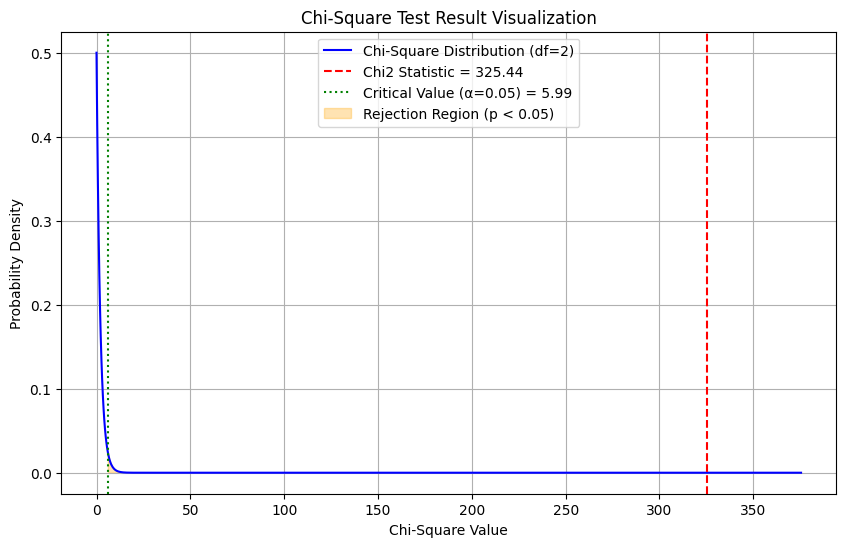

In [ ]:
from scipy.stats import chi2

chi2_stat = 325.44
df = 2
alpha = 0.05

critical_val = chi2.ppf(1 - alpha, df)

x = np.linspace(0, chi2_stat + 50, 1000)
y = chi2.pdf(x, df)


plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Chi-Square Distribution (df={df})', color='blue')
plt.axvline(chi2_stat, color='red', linestyle='--', label=f'Chi2 Statistic = {chi2_stat:.2f}')
plt.axvline(critical_val, color='green', linestyle=':', label=f'Critical Value (α={alpha}) = {critical_val:.2f}')
plt.fill_between(x[x > critical_val], y[x > critical_val], color='orange', alpha=0.3, label='Rejection Region (p < 0.05)')


plt.title('Chi-Square Test Result Visualization')
plt.xlabel('Chi-Square Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


Hypotheses :<BR>
H₀ (Null Hypothesis): Diagnosis (benign vs malignant) and radius category (Low, Medium, High) are independent — no relationship.<BR>
H₁ (Alternative Hypothesis): They are dependent — there is a relationship.
<BR>

Since the p-value < 0.05 (in fact, it’s far less, ~0), you reject the null hypothesis.
<BR>There is a statistically significant association between tumor radius category and diagnosis, which means tumor size (radius) is strongly linked to whether the tumor is malignant or benign.

Also, a Chi-Square value of 325.44 (with df = 2) is far beyond typical critical values (e.g., 5.99 for p = 0.05). This means the probability of seeing this difference by random chance is effectively zero.
So you definitively reject the null hypothesis:
* Tumor size category is strongly associated with cancer diagnosis.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# count malignant cases in 'Low' and 'High' radius groups
group_counts = df1[df1['radius_cat'].isin(['Low', 'High'])]
group_malignant = group_counts[group_counts['diagnosis'] == 1]['radius_cat'].value_counts()
group_totals = group_counts['radius_cat'].value_counts()

count = [group_malignant['High'], group_malignant['Low']]  # number of malignant cases in each group
nobs = [group_totals['High'], group_totals['Low']]         # total observations in each group

stat, pval = proportions_ztest(count, nobs)

print("\nZ-Test for Proportions:")
print("Z-statistic:", stat)
print("p-value:", pval)



Z-Test for Proportions:
Z-statistic: 16.613389887769248
p-value: 5.575169725122995e-62


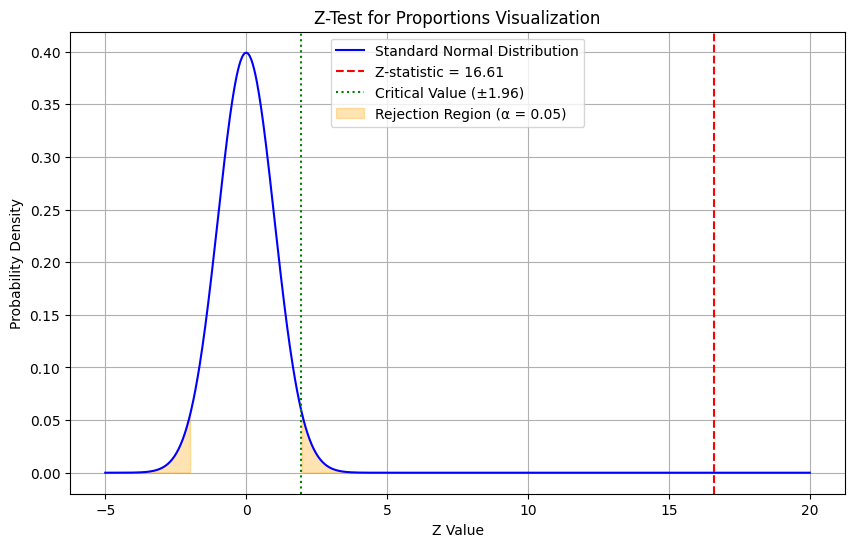

In [ ]:
from scipy.stats import norm


z_stat = 16.61
p_value = 5.575e-62
alpha = 0.05

x = np.linspace(-5, 20, 1000)
y = norm.pdf(x, 0, 1)

z_critical = norm.ppf(1 - alpha / 2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')
plt.axvline(z_stat, color='red', linestyle='--', label=f'Z-statistic = {z_stat:.2f}')
plt.axvline(z_critical, color='green', linestyle=':', label=f'Critical Value (±{z_critical:.2f})')

plt.fill_between(x, y, where=(x >= z_critical) | (x <= -z_critical), color='orange', alpha=0.3, label='Rejection Region (α = 0.05)')

plt.title('Z-Test for Proportions Visualization')
plt.xlabel('Z Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Hypotheses :<br>
H₀ (Null Hypothesis): The proportion of malignant cases is the same in both groups (e.g., Low vs High radius).<br>
H₁ (Alternative Hypothesis): The proportion of malignant cases is different between the groups.


The Z-statistic is extremely large (far beyond typical thresholds like ±1.96 for 95% confidence).<bR>
The p-value is much smaller than 0.05, so you reject the null hypothesis.

<BR>There is a statistically significant difference in the proportion of malignant cases between the Low and High radius groups.
Patients with high tumor radius are significantly more likely to have malignant tumors than those with low radius.